In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

Information about the data set is from https://archive.ics.uci.edu/ml/datasets/automobile
Data is available to download from: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
As the column names are not included in the .data file, the attribute information is saved in a .txt file and extracted

In [2]:
with open('car_attribute_information.txt') as f:
    text = f.read()
    index_names = re.findall(r'[0-9]{1,2}. ([\w-]+):', text)

In [3]:
car_df = pd.read_csv('imports-85.data', names=index_names)

In [4]:
car_df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There are no NaN values, but there are '?' in place.

In [6]:
car_df = car_df.replace('?', np.NaN)

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
car_df['num-of-cylinders'].value_counts(dropna=False)
car_df['num-of-doors'].value_counts(dropna=False)

four    114
two      89
NaN       2
Name: num-of-doors, dtype: int64

Function to convert num-of-cylinders and num-of-doors from text to integers. Only need to go up to 12

In [9]:
def convert_text_to_int(text):
    if pd.isnull(text):
        return text
    conversion = {
        'one':1,
        'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'seven':7,
        'eight':8,
        'nine':9,
        'ten':10,
        'eleven':11,
        'twelve':12
    }
    return conversion[text]

In [10]:
car_df['num-of-doors'] = car_df['num-of-doors'].apply(convert_text_to_int)
car_df['num-of-cylinders'] = car_df['num-of-cylinders'].apply(convert_text_to_int)

In [11]:
car_df['price'] = car_df['price'].astype('float')
car_df['bore']=car_df['bore'].astype('float')
car_df['stroke']=car_df['stroke'].astype('float')
car_df['horsepower']=car_df['horsepower'].astype('float')
car_df['peak-rpm']=car_df['peak-rpm'].astype('float')
car_df['price']=car_df['price'].astype('float')

In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Drop normalized-losses due to the high proportion of NaN values. Drop any non quantitative values.

In [13]:
cols_to_drop = ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 
                'engine-location', 'engine-type', 'fuel-system', ]
car_df.drop(cols_to_drop, axis=1, inplace=True)

In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   num-of-doors       203 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    int64  
 8   engine-size        205 non-null    int64  
 9   bore               201 non-null    float64
 10  stroke             201 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         203 non-null    float64
 13  peak-rpm           203 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              201 non

In [15]:
car_df.dropna(inplace=True)

In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   num-of-doors       193 non-null    float64
 2   wheel-base         193 non-null    float64
 3   length             193 non-null    float64
 4   width              193 non-null    float64
 5   height             193 non-null    float64
 6   curb-weight        193 non-null    int64  
 7   num-of-cylinders   193 non-null    int64  
 8   engine-size        193 non-null    int64  
 9   bore               193 non-null    float64
 10  stroke             193 non-null    float64
 11  compression-ratio  193 non-null    float64
 12  horsepower         193 non-null    float64
 13  peak-rpm           193 non-null    float64
 14  city-mpg           193 non-null    int64  
 15  highway-mpg        193 non-null    int64  
 16  price              193 non

We now have a data set of 193 to work with

#### Standardize the remaning feature values

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(car_df.drop("price", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_features = scaler.transform(car_df.drop('price', axis = 1))

In [21]:
cars = pd.DataFrame(scaled_features, columns = car_df.columns[:-1])
cars.head(3)


,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.679053,-0.557058
1,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.679053,-0.557058
2,0.16397,-1.175889,-0.720911,-0.251195,-0.184679,-0.615412,0.497764,1.548523,0.575559,-2.394827,0.702918,-0.288273,1.334283,-0.213359,-0.992963,-0.704134


In [22]:
cars.info()
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    float64
 1   num-of-doors       193 non-null    float64
 2   wheel-base         193 non-null    float64
 3   length             193 non-null    float64
 4   width              193 non-null    float64
 5   height             193 non-null    float64
 6   curb-weight        193 non-null    float64
 7   num-of-cylinders   193 non-null    float64
 8   engine-size        193 non-null    float64
 9   bore               193 non-null    float64
 10  stroke             193 non-null    float64
 11  compression-ratio  193 non-null    float64
 12  horsepower         193 non-null    float64
 13  peak-rpm           193 non-null    float64
 14  city-mpg           193 non-null    float64
 15  highway-mpg        193 non-null    float64
dtypes: float64(16)
memory usag

In [23]:
cars['price'] = car_df['price'].reset_index(drop=True)


Add back the price column to the dataframe that now has standardized values 

In [24]:
cars.head(3)

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.679053,-0.557058,13495.0
1,1.78685,-1.175889,-1.682379,-0.444024,-0.841263,-2.122598,-0.025713,-0.411247,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.679053,-0.557058,16500.0
2,0.16397,-1.175889,-0.720911,-0.251195,-0.184679,-0.615412,0.497764,1.548523,0.575559,-2.394827,0.702918,-0.288273,1.334283,-0.213359,-0.992963,-0.704134,16500.0


### Univariate model 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [26]:
def knn_train_test(train_column, target_column, dataframe):
    X = dataframe[[train_column]]
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=91)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return rmse

In [27]:
features= list(cars)[:-1]

In [28]:
knn_train_test('engine-size', 'price', cars)

2429.3771927857533

In [29]:
rmse_dict = {}
for feat in features:
    rmse = knn_train_test(feat, 'price', cars)
    rmse_dict[feat]=rmse
rmse_results_series = pd.Series(rmse_dict)
rmse_results_series.sort_values(inplace=True)
rmse_results_series.name = 'RMSE'
rmse_results_series

engine-size          2429.377193
horsepower           2573.297187
city-mpg             3758.380672
highway-mpg          4088.619632
width                4161.918887
curb-weight          4262.996585
num-of-cylinders     5265.703512
compression-ratio    5383.079407
wheel-base           5713.432533
peak-rpm             5907.506862
length               5932.495882
bore                 6262.463047
symboling            7162.927627
stroke               7328.241481
height               7511.068849
num-of-doors         7717.734555
Name: RMSE, dtype: float64

This shows that the engine-size column performed best. Having the lowest RMSE when predicting the value, although this is dependent on the sample taken. The best performing features for th train/test split used are:
* engine-size
* horsepower
* city-mpg
* highway-mpg
* width  

### Changing the value of K  

In [30]:
def knn_train_test_i(train_column, target_column, dataframe, i):
    X = dataframe[[train_column]]
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=91)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return rmse

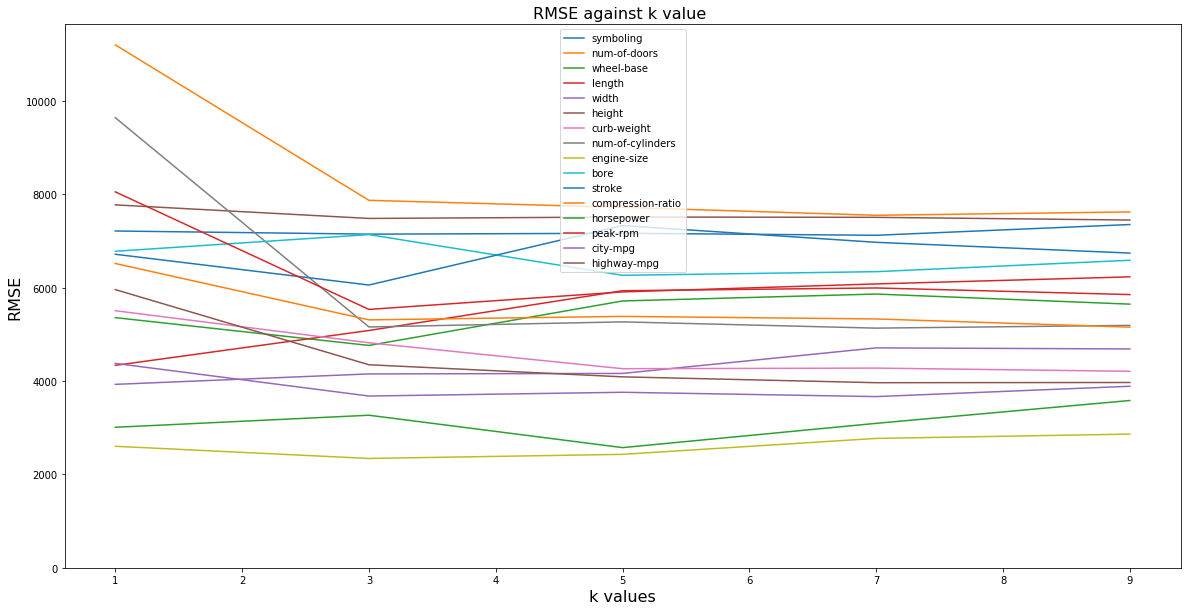

In [31]:
k_values = list(range(1,10,2))
plt.figure(figsize=(20,10))
for feat in features:
    rmses = []
    for k in k_values:
        rmses.append(knn_train_test_i(feat, 'price', cars, k))
    plt.plot(k_values,rmses, label=feat)
plt.title("RMSE against k value ", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.xlabel("k values", fontsize=16)
plt.legend()
plt.ylim(bottom=0)
plt.show()

This shows that in general over all the features a k value of 3 would be appropriate

### knn for multiple columns 

In [33]:
def knn_train_test_multiple_columns(train_columns, target_column, dataframe, i):
    X = dataframe[train_columns]
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=91)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return rmse

In [35]:
best_features = ["engine-size", "horsepower", "city-mpg", "highway-mpg", "width"]
n_features_rmse = {}
for i in range(2,6):
    rmse=knn_train_test_multiple_columns(best_features[:i], "price", cars, 5)
    n_features_rmse[i]=rmse

In [36]:
for k,v in n_features_rmse.items():
    print(f"For {k} features the rmse was {int(v)}")

For 2 features the rmse was 2512
For 3 features the rmse was 2283
For 4 features the rmse was 2166
For 5 features the rmse was 3834


This shows that for the train/test split used, considering four features gave the lowest RMSE. This was using a k of 5

### Hyperparameter tuning 
The value of k will be varied to find which gives the lowest rmse.
The best 5 features will be looked at.

In [38]:
n_features_rmse_k = {}
for i in range(2,6):
    n_features_rmse_k[str(i)+" features"]={}
    for k in range(1,25):
        rmse=knn_train_test_multiple_columns(best_features[:i], "price", cars, k)
        n_features_rmse_k[str(i)+" features"][k]=rmse
print(n_features_rmse_k)

{'2 features': {1: 2540.595762333356, 2: 2319.4654138474416, 3: 1938.8712989244807, 4: 2161.590748651366, 5: 2512.9995444378474, 6: 2706.4239046262815, 7: 2951.3437113156283, 8: 3047.3523793133763, 9: 3235.55486114393, 10: 3352.445977604802, 11: 3521.1632920158095, 12: 3428.166178716905, 13: 3544.7286954838755, 14: 3648.862646043816, 15: 3710.9428473944936, 16: 3796.917336529611, 17: 3901.9703492277126, 18: 3978.5034588569956, 19: 4038.4639707861047, 20: 4023.811800213136, 21: 3998.4451590791414, 22: 4034.86713102585, 23: 4087.6368686926294, 24: 4178.377413870061}, '3 features': {1: 2444.9852901327477, 2: 1895.8404389155714, 3: 1962.8301479382192, 4: 2104.8327466009723, 5: 2283.5619928463543, 6: 2279.017379275181, 7: 2395.849637146333, 8: 2696.3962855281334, 9: 3007.3689544699896, 10: 3190.955966558806, 11: 3223.534794859164, 12: 3334.267699324201, 13: 3389.187719886953, 14: 3468.5011286608315, 15: 3504.634608399398, 16: 3655.8249174314565, 17: 3783.658492280573, 18: 3878.2266884724063

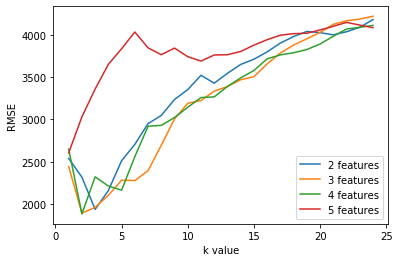

In [39]:
for k,v in n_features_rmse_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()

This shows that for 2,3or 4 features the RMSE, using a value of k of 2 or 3 gives the best results. Adding in a fifth feature changes this significantly.

### k-fold cross validation 

Using k-fold cross validation to eliminate bias from the selection of the train/test split.

In [41]:
from sklearn.model_selection import cross_val_score, KFold

In [58]:
def knn_train_test_multiple_columns_cv(train_columns, target_column, dataframe, i, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=i)
    mses = cross_val_score(knn, dataframe[train_columns], dataframe[target_column], scoring = 'neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    return avg_rmse,std_rmse

In [60]:
for fold in range(2,20):
    avg_rmse, std_rmse = knn_train_test_multiple_columns_cv(best_features[:2], 'price', cars,5, fold)
    print(f"With {fold} folds the average rmse was {avg_rmse}, the standard deviation was {std_rmse}")

With 2 folds the average rmse was 3282.0609147176865, the standard deviation was 290.565337716695
With 3 folds the average rmse was 2865.4445143941666, the standard deviation was 358.23908596135874
With 4 folds the average rmse was 3101.352889044345, the standard deviation was 357.84288048016447
With 5 folds the average rmse was 3072.4174738446827, the standard deviation was 360.25873276385
With 6 folds the average rmse was 2926.176878778224, the standard deviation was 652.5738743255189
With 7 folds the average rmse was 2866.7180676522985, the standard deviation was 521.0088690380276
With 8 folds the average rmse was 2772.137212994743, the standard deviation was 554.4730133090991
With 9 folds the average rmse was 2747.91853958227, the standard deviation was 983.7714190295462
With 10 folds the average rmse was 2757.4988369255684, the standard deviation was 909.4119444404608
With 11 folds the average rmse was 2608.273732916671, the standard deviation was 1018.9949313770798
With 12 folds 

The above was done using a k of 5.